In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit

In [2]:
toffa = pd.read_csv('./data/model/toffa_EM_morph.csv', index_col=0)
minia = pd.read_csv('./data/model/minia_EM_morph.csv', index_col=0)

In [3]:
o_toffa = np.unique(toffa['order'])
r_median_toffa = [np.median(toffa['radius'][toffa['order'] == i]) for i in o_toffa]
l_median_toffa = [np.median(toffa['length'][toffa['order'] == i]) for i in o_toffa]

In [4]:
o_minia = np.unique(minia['order'])
r_median_minia = [np.median(minia['radius'][minia['order'] == i]) for i in o_minia]
l_median_minia = [np.median(minia['length'][minia['order'] == i]) for i in o_minia]

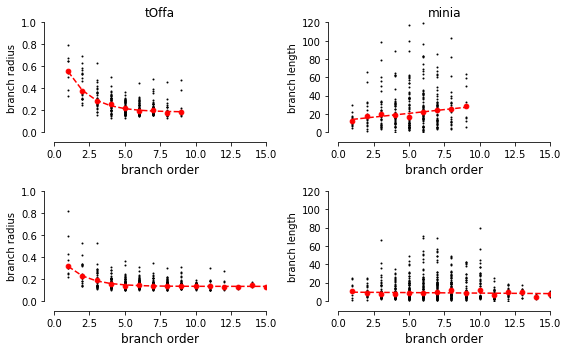

In [5]:
fig, ax = plt.subplots(2,2, figsize=(8,5))
ax = ax.flatten()
ax[0].scatter(toffa['order'], toffa['radius'], color='black', s=1)
ax[1].scatter(toffa['order'], toffa['length'], color='black', s=1)
ax[2].scatter(minia['order'], minia['radius'], color='black', s=1)
ax[3].scatter(minia['order'], minia['length'], color='black', s=1)

def func(x, a, b, c):
    return a * np.exp(-b * x) + c
popt, pcov = curve_fit(func, o_toffa, r_median_toffa)
ax[0].plot(o_toffa, func(o_toffa, *popt), 'r--')
ax[0].scatter(o_toffa, r_median_toffa, color='red', s=22)

popt, pcov = curve_fit(func, o_minia, r_median_minia)
ax[2].plot(o_minia, func(o_minia, *popt), 'r--')
ax[2].scatter(o_minia, r_median_minia, color='red', s=22)

def func(x, a, b):
    return a + b * x
popt, pcov = curve_fit(func, o_toffa, l_median_toffa)
ax[1].plot(o_toffa, func(o_toffa, *popt), 'r--')
ax[1].scatter(o_toffa, l_median_toffa, color='red', s=22)

popt, pcov = curve_fit(func, o_minia, l_median_minia)
ax[3].plot(o_minia, func(o_minia, *popt), 'r--')
ax[3].scatter(o_minia, l_median_minia, color='red', s=22)

for i in [0, 2]:
    ax[i].set_xlim(0, 15)
    ax[i].set_ylim(0, 1)
    ax[i].set_xlabel('branch order', fontsize=12)
    ax[i].set_ylabel('branch radius')
        
for i in [1, 3]:
    ax[i].set_xlim(0, 15)
    ax[i].set_ylim(0, 120)
    ax[i].set_xlabel('branch order', fontsize=12)
    ax[i].set_ylabel('branch length')
    

ax[0].set_title('tOffa')
ax[1].set_title('minia')
    
sns.despine(offset=10, trim=True)
fig.tight_layout()